In [47]:
import numpy as np
import matplotlib.pyplot as plt
import os, re, time, shutil
from PIL import Image

path="C:\\Users\\ЛФКИТ-3\\Documents\\Interferom\\img\\seq\\"
from IPython.display import clear_output
from IPython import display

from tqdm import tqdm

%matplotlib inline

In [76]:
# 5 sec -measure
# 5 sec interval
# first angle 340 deg

times,files=[],[]
for f in tqdm(os.listdir(path)):
    files.append(f)
    times.append((os.stat(path+f).st_ctime))
    num+=1
print('got %i files. dates are from %s fo %s'%(len(files),times[0],times[-3]))

100%|█████████████████████████████████████████████████████████████████████████████| 588/588 [00:00<00:00, 17490.40it/s]


got 588 files. dates are from 1527183176.6371534 fo 1527183702.404016


In [77]:
times[-10:]

[1527183696.8405566,
 1527183697.6065917,
 1527183698.3909295,
 1527183699.2731857,
 1527183700.0530877,
 1527183700.8341506,
 1527183701.6018834,
 1527183702.404016,
 1527183703.24626,
 1527183704.0542955]

In [107]:
start_time= time.mktime((2018,5,24,20,34,0,0,0,0))
print('atart time',time.ctime(start_time))

# delete all beforre start time
total_time=7.5*60
values, measm = [],[]
date = start_time
val = 0
i=0
while True:
    # 5 seconds for changing
    while date < times[i] < date+4:
        i+=1
        measm.append( files[i] )
        values.append( val )
        #print(val)
    date+=10
    if date > start_time+total_time:
        break
    val+=1
    while times[i]<date:
        i+=1

atart time Thu May 24 20:34:00 2018


In [105]:
np.savetxt('C:\\Users\\ЛФКИТ-3\\Documents\\Interferom\\data_files.csv',measm,delimiter=',',fmt='%s')

In [ ]:
np.savetxt('C:\\Users\\ЛФКИТ-3\\Documents\\Interferom\\data_labels.csv',values,delimiter=',',fmt='%s')

In [127]:
## READ IMAGES
images=[]
for f in measm:
    images.append(Image.open(os.path.join(path,f)))
    
def plot_images(imgs, columns=2):
    n=len(imgs)
    h = (n-1)//columns+1
    f,ax=plt.subplots(h,columns,figsize=(13,10*h/columns))
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    for i in range(1,n+1):
        ax[(i-1)//columns,i%columns-1].imshow(imgs[i-1],cmap='gray')
        
def get_if(arr1,arr2,cond):
    return [arr1[i] for i in range(len(arr1)) if cond(arr2[i])]

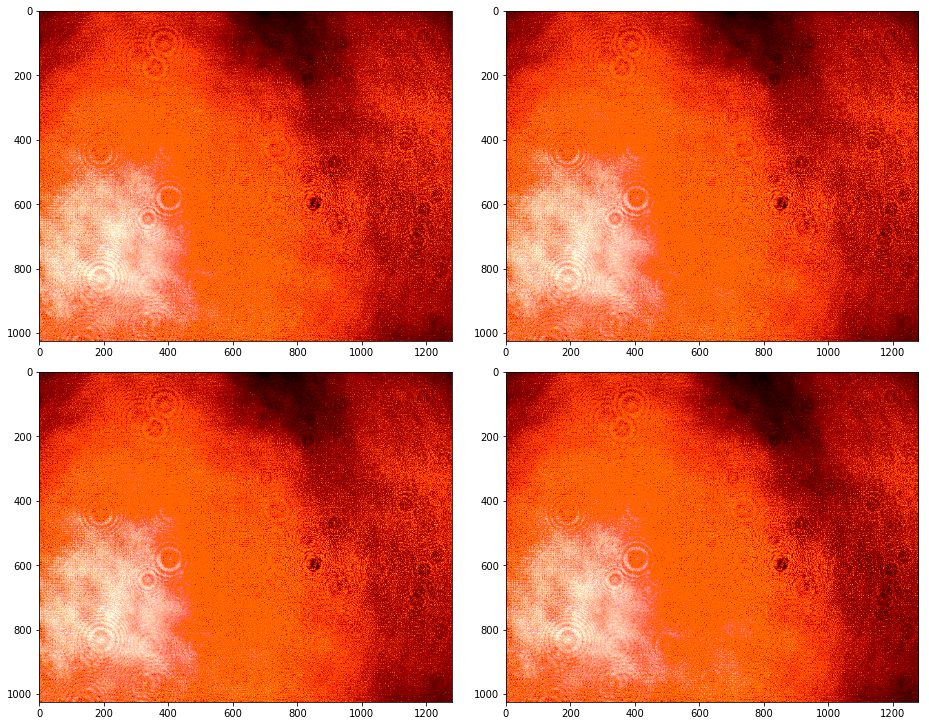

In [128]:
plot_images(get_if(images,values,lambda x:x==6))


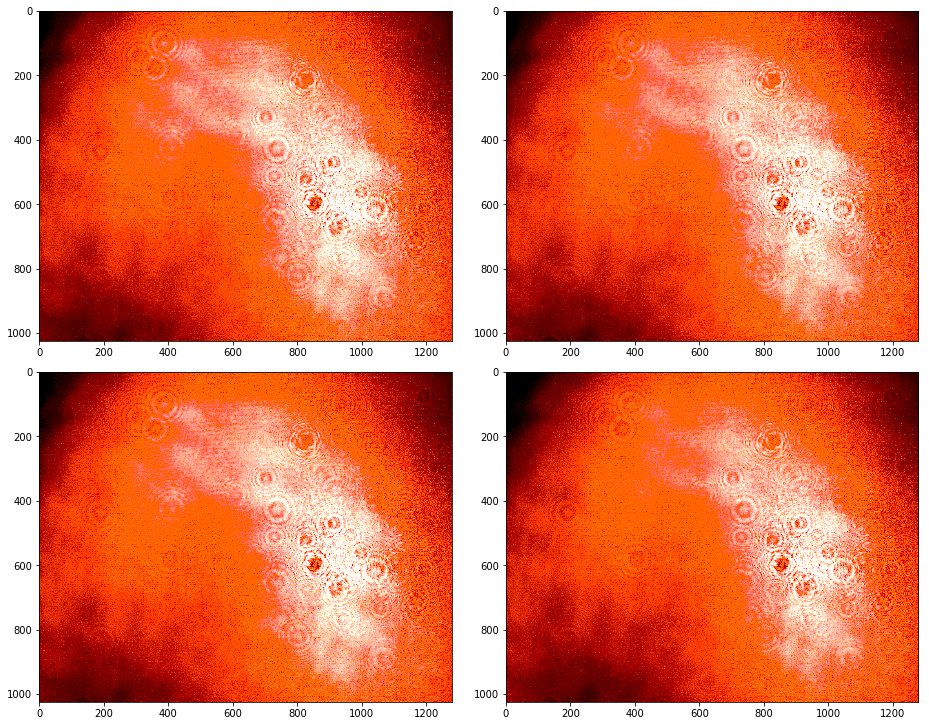

In [129]:
plot_images(get_if(images,values,lambda x:x==19))


Start:
340
+=1 min